#  Анализ юнит-экономики для приложения Procrastinate Pro+

- Автор: Смирнова Анастасия
- Дата: 12.06.2025

## Цели и задачи проекта

Приложение Procrastinate Pro+, предоставляет пользователям доступ к развлекательному контенту: видео, подкастам и блогам. Пользователи могут выбрать несколько пакетов контента. Пакеты различаются по цене, объёму и содержанию.

К началу лета в приложении появился новый вид контента — спортивный, а также была скорректирована маркетинговая стратегия привлечения пользователей. Согласно бизнес-модели продукта, привлечение должно окупиться за первые 28 дней (4 недели).

После запуска нового контента и изменения стратегии интерес к продукту в целом вырос, но выручка начала стагнировать.

**Цель проекта** - провести анализ юнит-экономики приложения в динамике за первые 28 дней для каждой когорты пользователей для того, чтобы выявить возможные причины стагнации в выручке.


**Задачи проекта**:

- провести анализ юнит-экономики продукта в динамике за первые 28 дней ждя каждой когорты;
- разобраться в причинах стагнации выручки;
- определить, какие источники привлечения приносят прибыль, а какие не выходят на уровень окупаемости;
- дать рекомендации отделу маркетинга.

## Описание данных

Данные собраны в трёх датасетах.

1. Датасет `ppro_visits.csv` — информация о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года:
    - `user_id` — уникальный идентификатор пользователя;
    - `region` — страна пользователя;
    - `device` — категория устройства пользователя;
    - `channel` — идентификатор рекламного источника, из которого пришёл пользователь;
    - `session_start` — дата и время начала сессии;
    - `session_end` — дата и время окончания сессии.

2. Датасет `ppro_orders.csv` — информация о покупках:
    - `user_id` — уникальный идентификатор пользователя, который сделал покупку;
    - `event_dt` — дата и время покупки;
    - `revenue` — выручка.

3. Датасет `ppro_costs.csv` — информация о затратах на маркетинг:
    - `dt` — дата
    - `channel` — идентификатор рекламного источника;
    - `costs` — затраты на этот рекламный источник в этот день.

## Содержимое проекта

1. Загрузка данных и знакомство с ними.

2. Подготовка данных к когортному анализу.

3. Анализ месячной динамики основных метрик продукта.

4. Анализ метрик в разрезе источника привлечения.

5. Анализ периода окупаемости маркетинговых вложений.

6. Выводы и рекомендации.
---

# Загрузка и предобработка данных

Загрузите данные и получите основную информацию о них. Проведите необходимую предобработку. Основную информацию о данных и предобработке зафиксируйте в кратком промежуточном выводе.

In [ ]:
#импортируем нужные библиотеки
import pandas as pd
pd.options.mode.chained_assignment = None


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

from IPython.display import display_html
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#загружаем датасеты
visits = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_visits.csv')

orders = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_orders.csv')

costs = pd.read_csv('https://code.s3.yandex.net/datasets/ppro_costs.csv')

Познакомимся с данными. Выведем информацию о количестве строк и столбцов, наименовании столбцов, типах данных, наличии полных дубликатов и пропусков. Для автоматизации процесса создадим функцию `df_info` при помощи которой будем выводить необходимую информацию.

In [ ]:
#создаём функцию df_info
def df_info(df, df_name = None):
    """
    Выводит информацию о датасете

    Parameters:
        df (name of pd.DataFrame): Датафрейм для обработки.
        df_name (str): Название датафрейма (для отображения).
    """

    print('-'*10,''*5,f'Информация о датафрейме {str(df_name)}: ', ''*5, '-'*10)
    print('')

    row_count = df.shape[0] #Возвращаем информацию о количестве строк
    print(f'1) Количество строк: {row_count}')

    column_count = df.shape[1] #Возвращаем информацию о количестве столбцов
    print(f'2) Количество столбцов: {column_count}')

    columns = df.dtypes #Возвращаем информацию столбцах и типах данных
    print('3) Типы данных:')
    print('')
    print(columns)
    print('')

    first_row = df.iloc[0, :] #Возвращаем первую строку датафрейма
    print(f'4) Первая строка:')
    print('')
    print(pd.Series(first_row))
    print('')

    is_null = df.isna().mean() * 100 #Возвращаем количество пропусков
    print(f'5) Доля пропусков в каждом из столбцов:')
    print('')
    print(is_null)
    print('')

    is_unique = df.duplicated().mean() * 100 #Возвращаем количество уникальных значений
    print(f'6) Полных дубликатов:')
    print('')
    print(is_unique)
    print('')
    print('-'*62)

Исследуем датафрейм `visits` с информацией о о посещениях приложения пользователями, которые зарегистрировались с 1 апреля 2024 года по 30 ноября 2024 года.

In [ ]:
#применяем функцию df_info к датафрейму visits
df_info(visits,'visits')

----------  Информация о датафрейме visits:   ----------

1) Количество строк: 161865
2) Количество столбцов: 6
3) Типы данных:

user_id           int64
region           object
device           object
channel          object
session_start    object
session_end      object
dtype: object

4) Первая строка:

user_id                 631105188566
region                         India
device                       desktop
channel                 MediaTornado
session_start    2024-04-01 03:48:00
session_end      2024-04-01 04:19:00
Name: 0, dtype: object

5) Доля пропусков в каждом из столбцов:

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

6) Полных дубликатов:

0.0

--------------------------------------------------------------


Количество и наименование столбцов в датафрейме соответствует заявленному в
описании к данным. Названия столбцов написаны в соответствии с `snake_case`.

В датафрейме отсутствуют пропуски и полные дубликаты.

Данные представлены типами `int64` и `object`.
Для корректности работы с датами необходимо выполнить преобразование данных в столбцах `session_start` и `session_end`  к типу `datetime`.

In [ ]:
#выполянем преобразование к datetime
for column in ['session_start','session_end']:
    visits[column] = pd.to_datetime(visits[column], format = '%Y-%m-%d %H:%M:%S')

#проверяем успешность преобразования
pd.DataFrame(visits[['session_start','session_end']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161865 entries, 0 to 161864
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   session_start  161865 non-null  datetime64[ns]
 1   session_end    161865 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.5 MB


""


Преобразование выполнено успешно.
Исследуем датафрейм `orders`.

In [ ]:
#применяем функцию df_info к датафрейму orders
df_info(orders,'orders')

----------  Информация о датафрейме orders:   ----------

1) Количество строк: 33893
2) Количество столбцов: 3
3) Типы данных:

user_id       int64
event_dt     object
revenue     float64
dtype: object

4) Первая строка:

user_id            771951256319
event_dt    2024-04-01 05:56:26
revenue                    2.99
Name: 0, dtype: object

5) Доля пропусков в каждом из столбцов:

user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64

6) Полных дубликатов:

0.0

--------------------------------------------------------------


Количество и наименование столбцов в датафрейме `orders` соответствует заявленному в описании к данным.

Названия столбцов написаны в соответствии с `snake_case`.

В датафрейме отсутствуют пропуски и полные дубликаты.

Данные представлены типами `int64`, `object` и `float64`.
Для корректности работы с датами необходимо выполнить преобразование данных в столбце `event_dt `к типу `datetime`, а также выполнить понижение разрядности в столбцах с числовыми данными для оптимизации скорости обработки датафрейма.

In [ ]:
#выполянем преобразование к datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format = '%Y-%m-%d %H:%M:%S')

#проверяем успешность преобразования
pd.DataFrame(orders['event_dt']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   event_dt  33893 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 264.9 KB


Для понижения разрядности в столбцах с числовыми данными создадим фукнцию `downcast`.

In [ ]:
#создаём функцию
def downcast(df):
    """
    Выполняет понижение разрядности в столбцах датафрейма с типами данных
    int64 и float64

    Parameters:
        df (name of pd.DataFrame): Датафрейм для обработки.
    """
    for dtype, column in zip(df.dtypes, df.columns):
        if dtype == 'int64':
            df[column] = pd.to_numeric(df[column], downcast = 'integer')
        elif dtype == 'float64':
            df[column] = pd.to_numeric(df[column], downcast = 'float')
    print('Результат понижения разрядности:')
    print('')
    return df.info()

In [ ]:
#применяем функцию для понижения разрядности
downcast(orders)

Результат понижения разрядности:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33893 entries, 0 to 33892
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   33893 non-null  int64         
 1   event_dt  33893 non-null  datetime64[ns]
 2   revenue   33893 non-null  float32       
dtypes: datetime64[ns](1), float32(1), int64(1)
memory usage: 662.1 KB


Преобразования выполнены успешно.
Исследуем датафрейм `costs`.

In [ ]:
#применяем функцию df_info к датафрейму costs
df_info(costs,'costs')

----------  Информация о датафрейме costs:   ----------

1) Количество строк: 976
2) Количество столбцов: 3
3) Типы данных:

dt          object
channel     object
costs      float64
dtype: object

4) Первая строка:

dt         2024-04-01
channel      FaceBoom
costs      124.938874
Name: 0, dtype: object

5) Доля пропусков в каждом из столбцов:

dt         0.0
channel    0.0
costs      0.0
dtype: float64

6) Полных дубликатов:

0.0

--------------------------------------------------------------


Количество и наименование столбцов в датафрейме `costs` соответствует заявленному в описании к данным.

Названия столбцов написаны в соответствии с `snake_case`.

В датафрейме отсутствуют пропуски и полные дубликаты.

Данные представлены типами `object` и `float64`.
Для корректности работы с датами необходимо выполнить преобразование данных в столбце `dt `к типу `datetime`, а также выполнить понижение разрядности в столбце с числовыми данными `costs` для оптимизации скорости обработки датафрейма.

In [ ]:
#выполянем преобразование к datetime
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')

#проверяем успешность преобразования
pd.DataFrame(costs['dt']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      976 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 KB


In [ ]:
#применяем функцию для понижения разрядности
downcast(costs)

Результат понижения разрядности:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       976 non-null    datetime64[ns]
 1   channel  976 non-null    object        
 2   costs    976 non-null    float32       
dtypes: datetime64[ns](1), float32(1), object(1)
memory usage: 19.2+ KB


На этом предварительная предобработка данных завершена.
В итоге были выполнены следующие преобразования:

- В датафреймах `visits`, `orders` и `costs` выполнены преобразования данных для столбцов, содержащих информацию о датах и времени, из `object` в `datetime`;
- Выполнено понижение разрядности в столбцах с числовыми данными для ускорения обработки информации в датафреймах.

Можно отметить, что собранные данные являются полными и обладают достаточным качеством для проведения оценки юнит-экономики, так как в них отсутствуют дубликаты и пропуски.

# Подготовка данных к когортному анализу

Подготовим данные к когортному анализу для изучения окупаемости за первые 28 дней.

Для начала определим дату первой сессии для каждого пользователя и первый канал привлечения, откуда пришёл пользователь. Полученные данные сохраним в таблицу `profiles`.

In [ ]:
#находим дату первой сессии пользователя
visits['first_dt'] = visits.groupby(['user_id'])['session_start'].transform('min')

#оставляем данные только о первой сессии пользователя
profiles = visits[visits['session_start'] == visits['first_dt']][['user_id','first_dt','channel']].copy()

#обрезаем дату первой сессии до дня
profiles['first_dt'] = pd.to_datetime(profiles['first_dt'].dt.strftime('%Y-%m-%d'))

#меняем название столбца с каналом привлечения
profiles = profiles.rename(columns = {'channel':'first_channel'})

#оцениваем размер получившегося датафрейма
print(f'Количество строк в датафрейме `profiles`: {len(profiles)}')

Количество строк в датафрейме `profiles`: 74856


В получившемся датафрейме `profiles` количество строк меньше, чем в исходном датиафрейме `visits`. Таким образом данные были отфильтрованы только по первой сессии пользователя, где значения в столбце `session_start` и `first_dt` совпадают.

Для дальнейшего удобства работы формат даты первой сессии был усечён до дня.

Вычислим CAC по формуле: расходы на маркетинг / количество привлечённых пользователей по дням.

Для этого присоединим информацию о затратах на маркетинг по каждому каналу привлечения по дням и поделим на уникальное количество пользователей, пришедших через данный канал.

In [ ]:
#рассчитаем количество пользователей по каждой когорте
user_count = profiles.groupby(['first_dt','first_channel'])['user_id'].nunique().reset_index(name = 'user_count')

#присоединяем информацию о расходах на маректинг
cac_data = pd.merge(costs,
                    user_count,
                    left_on = ['dt','channel'],
                    right_on = ['first_dt','first_channel'],
                    how = 'left')

#вычисляем cac
cac_data['cac'] = cac_data['costs'] / cac_data['user_count']

#присоединяем информацию о cac к датафрейму profile
profiles = pd.merge(profiles,
                    cac_data[['first_channel','first_dt','cac']],
                    on = ['first_dt','first_channel'],
                    how = 'left')

Добавим информацию о дате первой сессии, канале привлечения и cac в таблицу с данными о событиях и покупках и рассчитаем дневной лайфтайм для каждого события.



In [ ]:
#присоединяем информацию с датой первой сессии
orders = pd.merge(orders,
                  profiles[['user_id','first_dt','first_channel']],
                  how = 'left',
                  on = 'user_id')

orders['event_dt'] = pd.to_datetime(orders['event_dt'].dt.strftime('%Y-%m-%d'))

#находим лайфтайм в днях
orders['lifetime'] = (orders['event_dt'] - orders['first_dt']).dt.days.astype(int)

Данные подготовлены. Перейдём к расчёту и анализу основных метрик юнит-экономики.

# Анализ месячной динамики основных метрик продукта

## **Задача 1**. Расчёт DAU, MAU, Stickiness Rate

Начнём анализ с изучения динамики активности пользователей их вовлечённости в продукт. Для этого рассчитаем DAU, MAU, Stikiness Ratio.

Начнём с расчёта DAU и MAU.

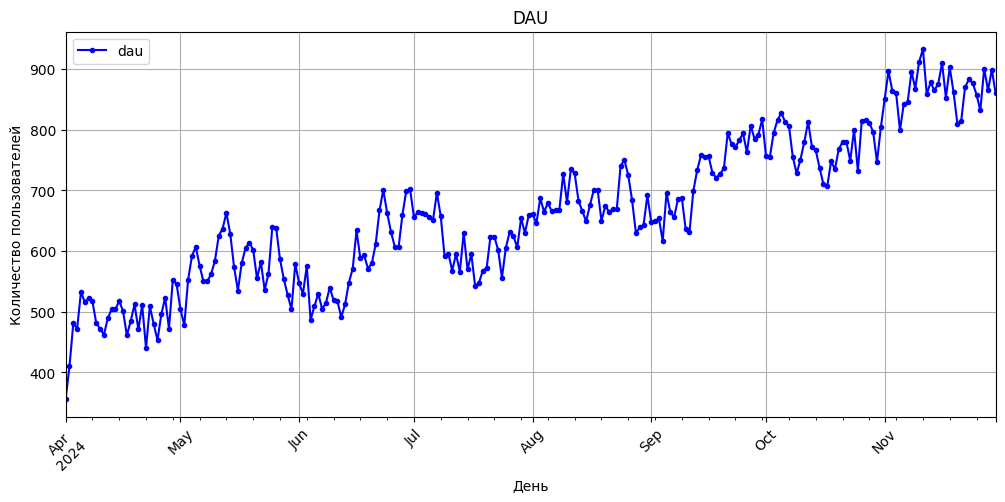

In [ ]:
#меняем формат даты для расчёта dau
visits['day'] = pd.to_datetime(visits['session_start'].dt.strftime('%Y-%m-%d'))

#вычисляем dau
dau_data = visits.groupby('day')['user_id'].nunique().reset_index(name = 'dau')

#визуализируем метрику
dau_data.plot(figsize = (12,5),
              kind = 'line',
              x = 'day',
              xlabel = 'День',
              ylabel = 'Количество пользователей',
              rot = 45,
              y = 'dau',
              marker = '.',
              grid = True,
              legend = True,
              title = 'DAU',
              color = 'blue')

plt.show()

Несмотря на то что метрика шумная, на протяжении всего наблюдамоего периода DAU растёт. Это говорит об увеличении количества новых пользователей в приложении.

Рассчитаем MAU.

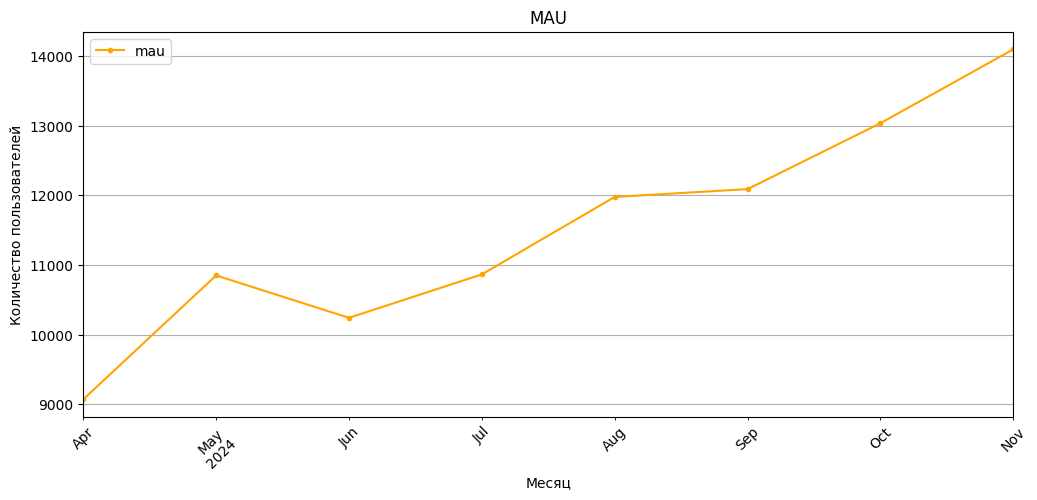

In [ ]:
#меняем формат даты для расчёта mau
visits['month'] = pd.to_datetime(visits['session_start'].dt.strftime('%Y-%m-%d')).dt.to_period("M")

#вычисляем mau
mau_data = visits.groupby('month')['user_id'].nunique().reset_index(name = 'mau')

#визуализируем метрику
mau_data.plot(figsize = (12,5),
              kind = 'line',
              x = 'month',
              xlabel = 'Месяц',
              ylabel = 'Количество пользователей',
              rot = 45,
              y = 'mau',
              marker = '.',
              grid = True,
              legend = True,
              title = 'MAU',
              color = 'orange')

plt.show()

Динамика MAU коррелирует с динамикой DAU. Количество активных пользователей по месяцам также увеличивается на протяжении всего наблюдаемого периода.

Теперь рассчитаем Stickiness Ratio по формуле: (Среднемесячный DAU / MAU) * 100%.

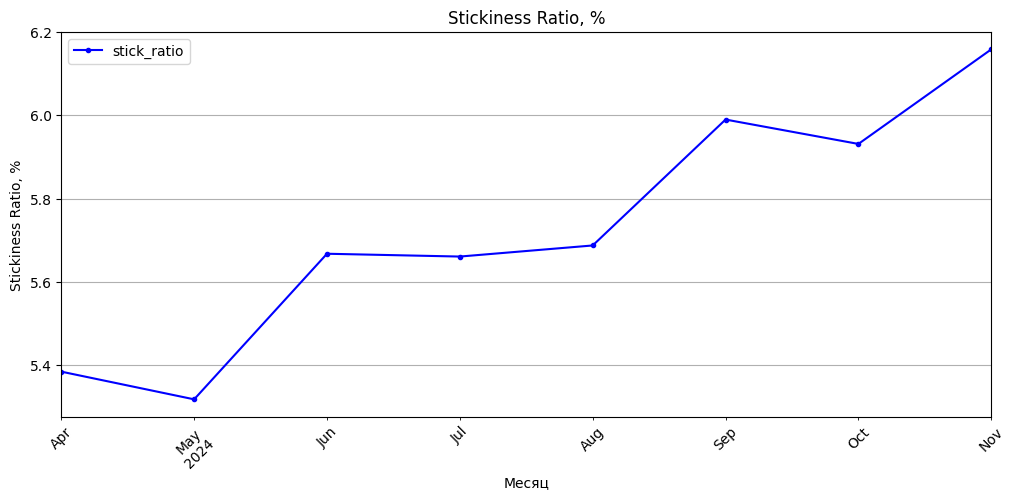

In [ ]:
#находим среднемесячный DAU
dau_data['month'] = pd.to_datetime(dau_data['day'].dt.strftime('%Y-%m-%d')).dt.to_period('M')

dau_avg = dau_data.groupby('month')['dau'].mean().reset_index()

#объединяем данные
stickiness_data = pd.merge(dau_avg,
                           mau_data,
                           on = 'month',
                           how = 'left')

#находим stickiness ratio
stickiness_data['stick_ratio'] = (stickiness_data['dau'] / stickiness_data['mau']) * 100

#визуализируем метрику
stickiness_data.plot(figsize = (12,5),
              kind = 'line',
              x = 'month',
              xlabel = 'Месяц',
              ylabel = 'Stickiness Ratio, %',
              rot = 45,
              y = 'stick_ratio',
              marker = '.',
              grid = True,
              legend = True,
              title = 'Stickiness Ratio, %',
              color = 'blue')

plt.show()

На протяжении наблюдаемого периода также наблюдается рост stickiness ratio с 5,4% до 6,2%. Это свидетельствует о росте частоты использования приложения и подтверждает гипотезу о том, что с введением нового контента рост интереса к продукту вырос.

## **Задача 2**. Расчёт CAC, LTV, ROI.

В разрезе каждого месяца привлечения новых пользователей рассчитаем:
- Среднюю стоимость привлечения пользователя (CAC).
- Значение LTV и ROI с учётом покупок, совершённых за 28 дней с момента привлечения.

При расчёте LTV и ROI учитываются все привлечённые пользователи когорты.

Начнём с расчёта среднемесячной CAC.

Визуализируйте метрики и сформулируйте небольшой промежуточный вывод. Сделайте акцент на общей динамике изменения метрик с учётом появления нового контента в начале лета.

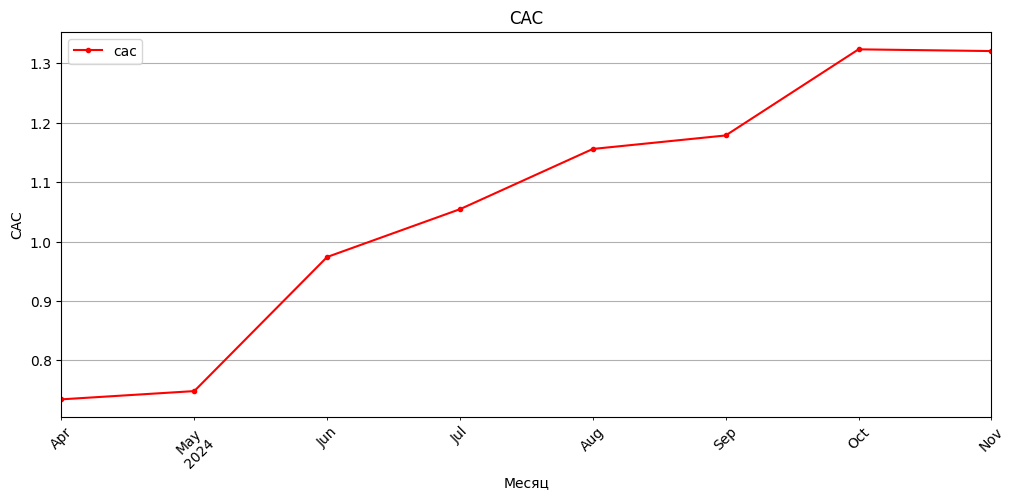

In [ ]:
#выделяем месяц когорты
profiles['cohort_month'] = profiles['first_dt'].dt.to_period("M").dt.to_timestamp()

#находим среднемесячную cac
cac_mean = profiles.groupby(['cohort_month'])['cac'].mean().reset_index()

#визуализируем метрику
cac_mean.plot(figsize = (12,5),
              kind = 'line',
              x = 'cohort_month',
              xlabel = 'Месяц',
              ylabel = 'CAC',
              rot = 45,
              y = 'cac',
              marker = '.',
              grid = True,
              legend = True,
              title = 'CAC',
              color = 'red')

plt.show()

Начиная с июня наблюдается увеличение средних затрат на привлечение пользователя. Необходим более детальный анализ метрики в разрезе каналов привлечения для того, чтобы выяснить, связана ли данная тенденция с конкретным каналом, или же рост CAC наблюдается по нескольким каналам привлечения одновременно.

Рассчитаем LTV по когортам по формуле: Накопленный доход за 28 дней / Количество клиентов в когорте.

При расчёте будем учитывать только те покупки и события, которые были совершены в первые 28 дней с момента регистрации пользователем.

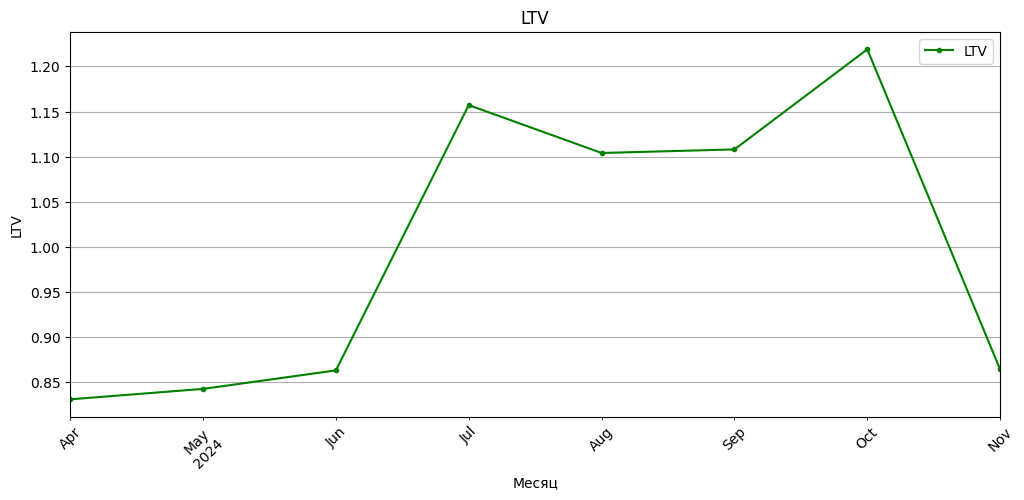

In [ ]:
#выделяем месяц когорты
orders['cohort_month'] = orders['first_dt'].dt.to_period("M").dt.to_timestamp()

#находим количество пользователей в когорте
user_count = profiles.groupby('cohort_month')['user_id'].nunique().reset_index(name = 'user_count')

#отбираем данные по покупкам, совершенным в первые 28 дней
transactions = orders[orders['lifetime'].between(0,28)].copy()

#находим сумму совершенных покупок по когортам
purchases = transactions.groupby(['cohort_month'])['revenue'].sum().reset_index()

#объединяем данные
ltv_mean = pd.merge(purchases,
                    user_count,
                    on = 'cohort_month',
                    how = 'left')

#рассчитываем LTV
ltv_mean['LTV'] = ltv_mean['revenue'] / ltv_mean['user_count']


#визуализируем метрику
ltv_mean.plot(figsize = (12,5),
              kind = 'line',
              x = 'cohort_month',
              xlabel = 'Месяц',
              ylabel = 'LTV',
              rot = 45,
              y = 'LTV',
              marker = '.',
              grid = True,
              legend = True,
              title = 'LTV',
              color = 'green')

plt.show()

Начиная с июня видны положительные изменения в динамике LTV. Для каждой новой короты пользователей LTV увеличивася по сравнению с предыдущей. Однако для когорты ноября произошёл резкий спад LTV до уровня весны 2024 года.

Рассчитаем ROI по формуле: (LTV в периоде - CAC когорты) / CAC когорты * 100

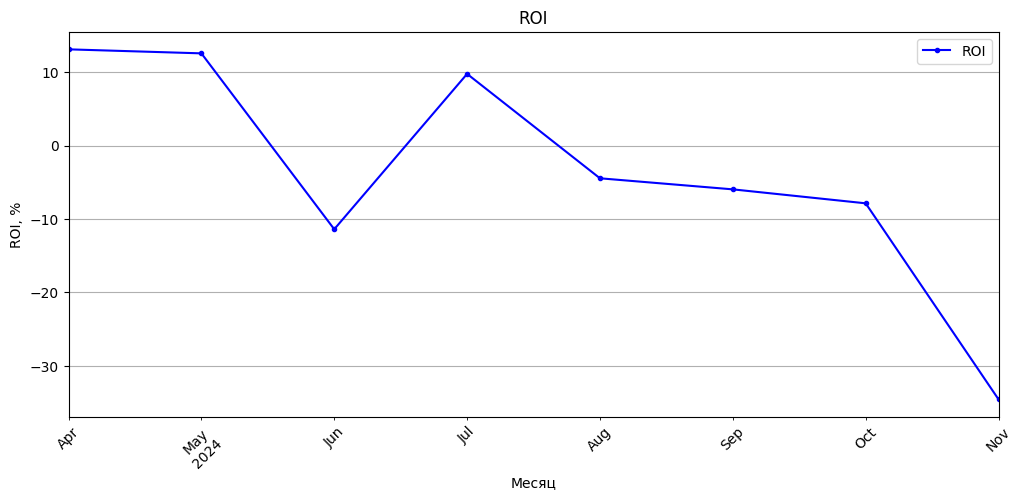

In [ ]:
#объединяем данные
roi_df = pd.merge(ltv_mean,
                  cac_mean,
                  on = 'cohort_month',
                  how = 'left')

roi_df['ROI'] = (roi_df['LTV'] - roi_df['cac'])/roi_df['cac'] * 100

#визуализируем метрику
roi_df.plot(figsize = (12,5),
              kind = 'line',
              x = 'cohort_month',
              xlabel = 'Месяц',
              ylabel = 'ROI, %',
              rot = 45,
              y = 'ROI',
              marker = '.',
              grid = True,
              legend = True,
              title = 'ROI',
              color = 'blue')

plt.show()

На графике видно небольшое увеличение ROI в июле после появления нового типа контента в приложении. Однако после июля наблюдается постепенное снижение ROI, а в ноябре ROI и вовсе становится отрицательным, что объясняется резким падением LTV при возрастающей CAC.

## Вывод

По результатам анализа можно сделать следующие выводы:

- На протяжении всего рассматриваемого периода количество активных пользователей увеличивается. Повышается также и частота использования приложения, что указывает на положительное влияние появления нового типа контента в приложении;
- CAC на пользователя растёт стремительнее чем LTV, поэтому, начиная с июля ROI постепенно снижается, а в ноябре и вовсе приобретает отрицательную динамику, что связано с резким падением LTV для данной когорты пользователей.

Необходимо изучить динамику показателей в разерезе каналов для того, чтобы получить детально представление о произошедших изменениях.

# Анализ метрик в разрезе источника привлечения

Теперь необходимо разобраться, какие источники привлечения перспективны, а какие за 28 дней не окупились.

## **Задача 1**. Анализ источников привлечения

Рассчитаем общее число привлечённых пользователей для каждого источника.


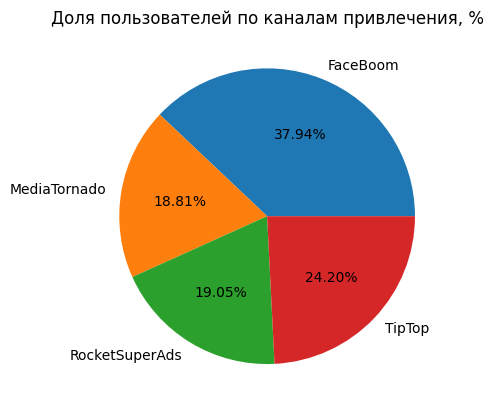

In [ ]:
#считаем количество пользователей
grouped_channels = profiles.groupby('first_channel')['user_id'].nunique().reset_index(name = 'user_count')

#находим долю
grouped_channels['%'] = round(grouped_channels['user_count'] / grouped_channels['user_count'].sum() * 100,2)

#строим диаграмму
values = grouped_channels['%']
labels = grouped_channels['first_channel']

plt.pie(values, labels = labels, autopct = '%1.2f%%')

plt.title('Доля пользователей по каналам привлечения, %')
plt.show()

Всего существует четыре канала привлечения пользователей. Больше всего пользователей было привлечено через канал FaceBoom. Меньше всего пользователей - через канал MediaTornado.

Рассмотрим динамику набора новых пользователей по дням для каждого источника.

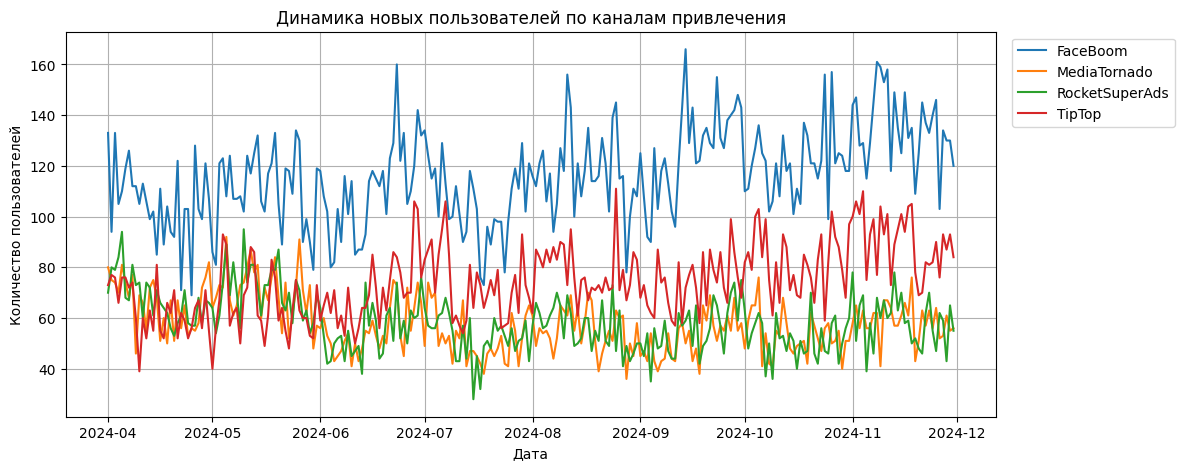

In [ ]:
#находим количество новых пользователей по каналам привлечения по дням
users_stats = profiles.groupby(['first_channel','first_dt'])['user_id'].nunique().reset_index(name = 'users_count')

users_stats['first_dt'] = users_stats['first_dt'].dt.to_period('D').dt.to_timestamp()

#строим график
plt.subplots(figsize=(12,5))

for value in users_stats['first_channel'].unique():
    plt.plot(
        users_stats[users_stats['first_channel'] == value]['first_dt'],
        users_stats[users_stats['first_channel'] == value]['users_count']
    )

plt.title('Динамика новых пользователей по каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.legend(labels = users_stats['first_channel'].unique(),
           bbox_to_anchor=(0.7, 0., 0.5, 1))

plt.show()

Наибольшее количество новых пользователей приходит через канал FaceBoom. После начала лета значимых отличий в количестве новых пользователей не наблюдается.

Рассчитаем и визуализируем динамику DAU, MAU и Stickiness по источникам привлечения.

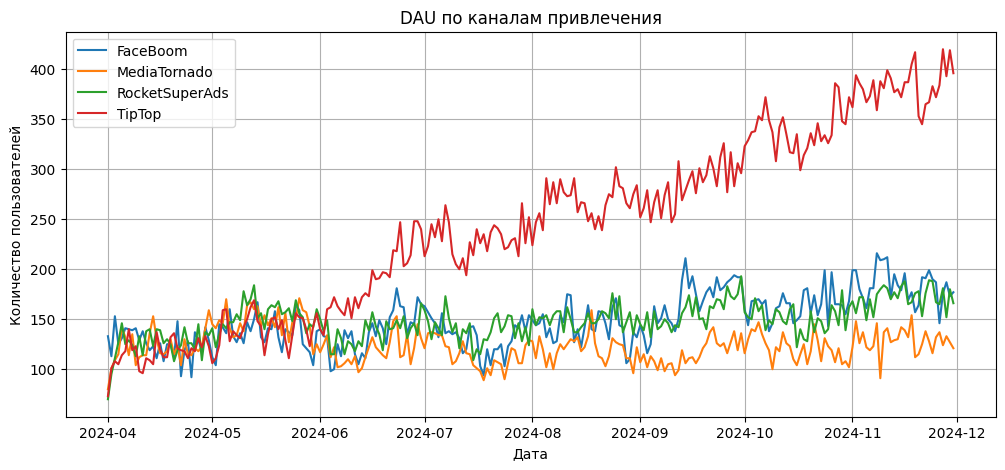

In [ ]:
#вычисляем dau
visits = pd.merge(visits,
                  profiles[['user_id','first_channel']],
                  on = 'user_id',
                  how = 'left')

dau_data_сh = visits.groupby(['day','first_channel'])['user_id'].nunique().reset_index(name = 'dau')

dau_data_сh['day'] = dau_data_сh['day'].dt.to_period('D').dt.to_timestamp()

#строим график
plt.subplots(figsize=(12,5))

for value in dau_data_сh['first_channel'].unique():
    plt.plot(
        dau_data_сh[dau_data_сh['first_channel'] == value]['day'],
        dau_data_сh[dau_data_сh['first_channel'] == value]['dau']
    )

plt.title('DAU по каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.legend(labels = dau_data_сh['first_channel'].unique())

plt.show()

Начиная с июня DAU для канала TipTop показывает заметный рост (со 100 до 400 пользователей). DAU по остальным каналам привлечения остаётся практически неизменным.
Изучим MAU в разрезе каналов.

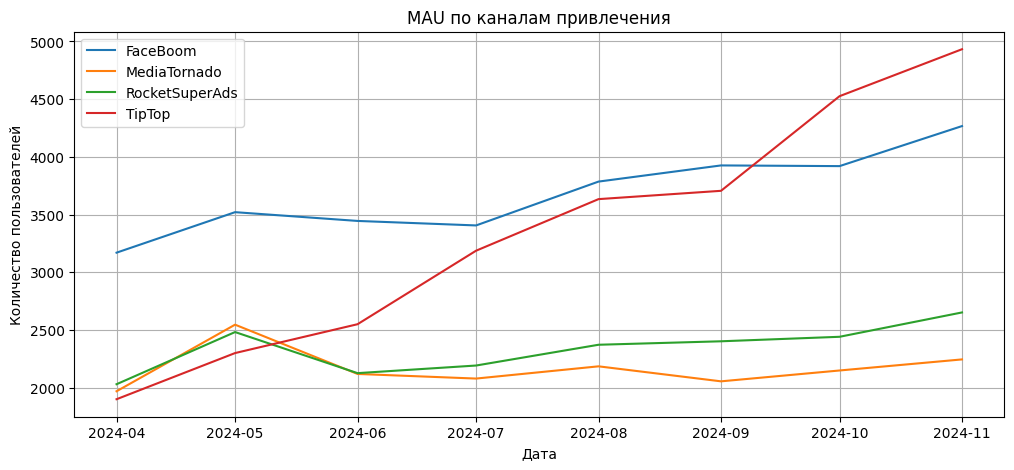

In [ ]:
#меняем формат даты для расчёта mau
visits['month'] = pd.to_datetime(visits['session_start'].dt.strftime('%Y-%m-%d')).dt.to_period("M").dt.to_timestamp()

#вычисляем mau
mau_data_ch = visits.groupby(['month','first_channel'])['user_id'].nunique().reset_index(name = 'mau')

#строим график
plt.subplots(figsize=(12,5))

for value in mau_data_ch['first_channel'].unique():
    plt.plot(
        mau_data_ch[mau_data_ch['first_channel'] == value]['month'],
        mau_data_ch[mau_data_ch['first_channel'] == value]['mau']
    )

plt.title('MAU по каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.legend(labels = mau_data_ch['first_channel'].unique())

plt.show()

Рост MAU по каналу TipTop коррелирует с динамикой DAU. Количество пользователей, привлечённых через данный канал, увеличилось с 2000 до 5000. Рост количества пользователей в месяц заметен также по каналу FaceBoom. По данному каналу рост не такой стремительный, но всё же видна явная положительная динамика (с 3250 до 4250 пользователей).

Рассчитаем Stickiness Ratio.

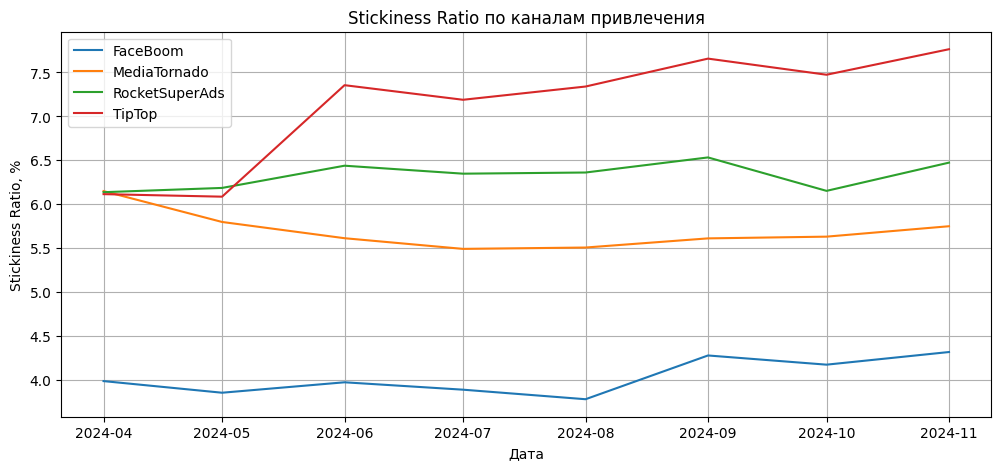

In [ ]:
#находим среднемесячный DAU
dau_data_сh['month'] = pd.to_datetime(dau_data_сh['day'].dt.strftime('%Y-%m-%d')).dt.to_period('M').dt.to_timestamp()

dau_avg_ch = dau_data_сh.groupby(['month','first_channel'])['dau'].mean().reset_index()

#объединяем данные
stickiness_data_ch = pd.merge(dau_avg_ch,
                              mau_data_ch,
                              on = ['month','first_channel'],
                              how = 'left')

#находим stickiness ratio
stickiness_data_ch['stick_ratio'] = (stickiness_data_ch['dau'] / stickiness_data_ch['mau']) * 100

#строим график
plt.subplots(figsize=(12,5))

for value in stickiness_data_ch['first_channel'].unique():
    plt.plot(
        stickiness_data_ch[stickiness_data_ch['first_channel'] == value]['month'],
        stickiness_data_ch[stickiness_data_ch['first_channel'] == value]['stick_ratio']
    )

plt.title('Stickiness Ratio по каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('Stickiness Ratio, %')
plt.grid(True)
plt.legend(labels = stickiness_data_ch['first_channel'].unique())

plt.show()

Каналы привлечения MediaTornado и RocketSuperAds показывают стабильную динамику частоты использования приложения c небольшими колебаниями в диапазоне менее 1%. Канал привлеченияTipTop показывает рост stickiness ratio с 6% до практически 8%, что говорит о том, что аудитория, привлекаемая через данный канал находит контент в приложении релевантныи и проявляет интерес к нему. Канал FaceBoom показывает самые низкие показатели по частоте использования приложения, однако динамика по данному каналу также стабильная, а после августа заметен небольшой рост stickiness ration в пределах 0,5%.

## **Задача 2**. Изучение динамики изменения метрик на 28-й день в разрезе источника.

 Для дальнейнего анализа метрик в разрезе каналов выделим когорты пользователей по неделе привлечения.

In [ ]:
#выделяем когорты по неделям регистрации
profiles['cohort_week'] = profiles['first_dt'].dt.to_period('W').dt.to_timestamp()

#присоединяем информацию о когортах к датафрейму visits
visits = pd.merge(visits,
                  profiles[['user_id','cohort_week']],
                  on = 'user_id',
                  how = 'left')

#присоединяем информацию о когортах к датафрейму orders
orders = pd.merge(orders,
                  profiles[['user_id','cohort_week']],
                  on = 'user_id',
                  how = 'left')

Рассчитаем удержание с 14-ого по 28-й день для когорт по неделям с разбивкой по каналам привлечения.


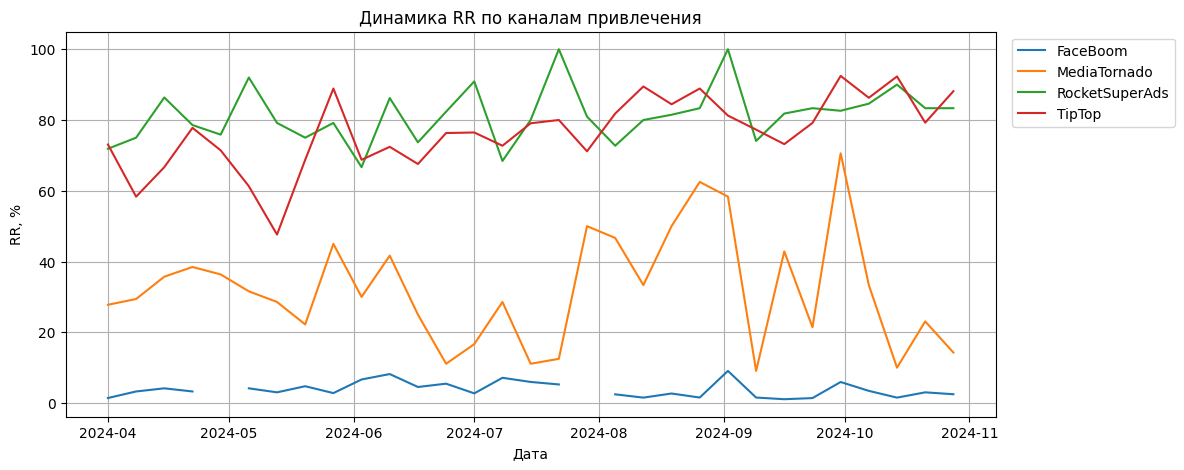

In [ ]:
#оставляем когорты пользовтателей, для которых на момент расчета прошло как минимум 28 дней с момента привлечения
relevant_orders = orders[orders['cohort_week'] <= '2024-10-28'].copy()

#считаем количество пользователей совершивших покупку в первый день после регистрации
day_0_users = relevant_orders[relevant_orders['lifetime'] == 0].copy()

day_0_users_cnt = day_0_users.groupby(['cohort_week','first_channel'])['user_id'].nunique().reset_index(name = 'day_zero')

#считаем количество пользователей, совершивших повторную покупку в заданный интервал
retained_users = orders[(orders['user_id'].isin(day_0_users['user_id'])) & (orders['lifetime'].between(14,28))].copy()


retained_users_cnt = retained_users.groupby(['cohort_week','first_channel'])['user_id'].nunique().reset_index(name = 'retained')

#рассчитываем RR
retention_df = pd.merge(day_0_users_cnt,
                        retained_users_cnt,
                        on = ['cohort_week','first_channel'],
                        how = 'left')

retention_df['RR'] = retention_df['retained'] / retention_df['day_zero'] * 100

#строим график
plt.subplots(figsize=(12,5))

for value in retention_df['first_channel'].unique():
    plt.plot(
        retention_df[retention_df['first_channel'] == value]['cohort_week'],
        retention_df[retention_df['first_channel'] == value]['RR']
    )

plt.title('Динамика RR по каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('RR, %')
plt.grid(True)
plt.legend(labels = retention_df['first_channel'].unique(),
           bbox_to_anchor=(0.7, 0., 0.5, 1))

plt.show()

Самые высокие значения RR среди пользователей, привлеченных через каналы RocketSuperAds и TipTop.

Среди пользователей, привлеченных через канал RocketSuperAds, от 80% до 100% пользователей совершают повторные покупки в период с 14-ого по 28-й день. После введения нового типа контента летом доля пользователей, совершающих повторные покупки, возросла и для некоторых когорт пользователей составила 100%.

Среди пользователей, привлеченных через канал TipTop, от 50% до 90% пользователей совершают повторные покупки в период с 14-ого по 28-й день. После появления новго типа контента RR вырос.

Доля пользователей, совершающих повторные покупки, привлеченных через канал MediaTornado демонстрирует самый большой разброс. После введения нового типа контента, RR для данного канала вырос. Рост метрики наблюдается для когорт пользователей, начавших пользоваться приложением с августа.

Для пользователей, привлеченных через канал FaceBoom, значения RR находятся на самом низком уровне. При этом пользователи, начавшие пользоваться приложением в августе, вовсе не совершали повторных покупок.

Рассчитаем конверсию в покупку.

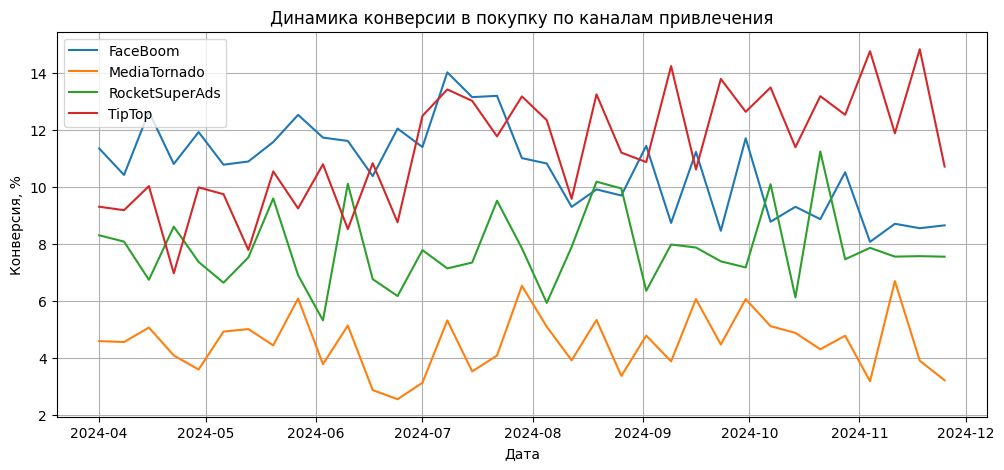

In [ ]:
#считаем количество пользователей по неделям
weekly_profiles = profiles.groupby(['cohort_week','first_channel'])['user_id'].nunique().reset_index(name = 'users_visited')

#оставляем релевантные транзакции
weekly_purchase = orders[orders['lifetime'].between(0,28)].copy()
weekly_purchase = weekly_purchase.groupby(['cohort_week','first_channel'])['user_id'].nunique().reset_index(name = 'purchases_made')

#объединяем датафреймы
conversion_data = pd.merge(weekly_profiles,
                           weekly_purchase,
                           on = ['cohort_week','first_channel'],
                           how = 'left')

#считаем конверсию
conversion_data['CR'] = conversion_data['purchases_made'] / conversion_data['users_visited'] * 100

#строим график
plt.subplots(figsize=(12,5))

for value in conversion_data['first_channel'].unique():
    plt.plot(
        conversion_data[conversion_data['first_channel'] == value]['cohort_week'],
        conversion_data[conversion_data['first_channel'] == value]['CR']
    )

plt.title('Динамика конверсии в покупку по каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('Конверсия, %')
plt.grid(True)
plt.legend(labels = conversion_data['first_channel'].unique())

plt.show()

Среди пользователей, привлеченных через канал TipTop наблюдается рост конверсии в покупку, начиная с июня.

Рост конверсии также наблюдается для пользователей, пришедших через каналы MediaTornado и RocketSuperAds.

Для пользователей, привлеченных через канал FaceBoom наблюдается снижение конверсии в наблюдаемый период.

Рассчитаем недельную динамику маркетинговых затрат по каналам привлечения.

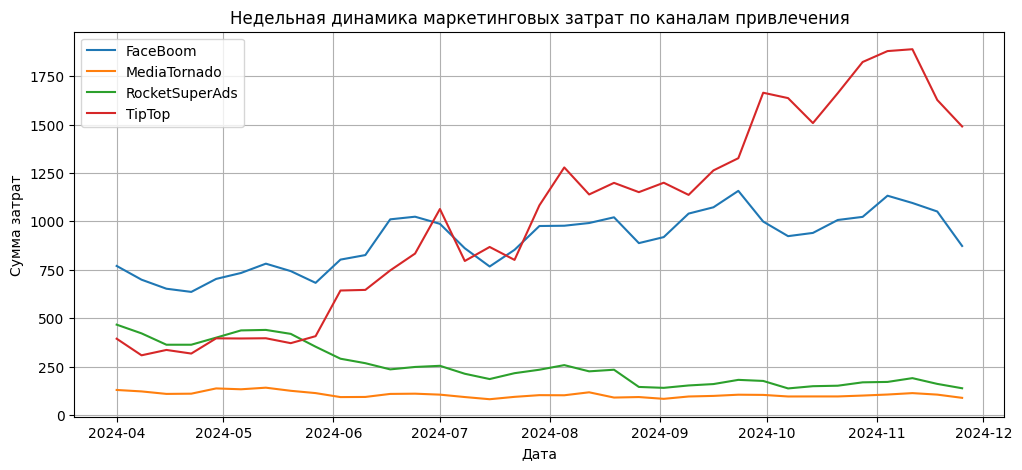

In [ ]:
#выделяем неделю из даты
costs['week'] = costs['dt'].dt.to_period('W').dt.to_timestamp()

#считаем затрат на маркетинг по неделям и каналам
marketing_mean = costs.groupby(['week','channel'])['costs'].sum().reset_index()

#строим график
plt.subplots(figsize=(12,5))

for value in marketing_mean['channel'].unique():
    plt.plot(
        marketing_mean[marketing_mean['channel'] == value]['week'],
        marketing_mean[marketing_mean['channel'] == value]['costs']
    )

plt.title('Недельная динамика маркетинговых затрат по каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('Сумма затрат')
plt.grid(True)
plt.legend(labels = marketing_mean['channel'].unique())

plt.show()

Начиная с июня наблюдается рост затрат на маркетинг по каналу TipTop. По всей видимости именно это повлияло на общее увеличение CAC. Заметен также незначительный рост маркетинговых затрат на канал FaceBoom. Для канала RocketSuperAds затраты были немного понижены, а для канала MediaTornado остались на прежнем уровне.

Изучим недельную динамику средней CAC по каналам.

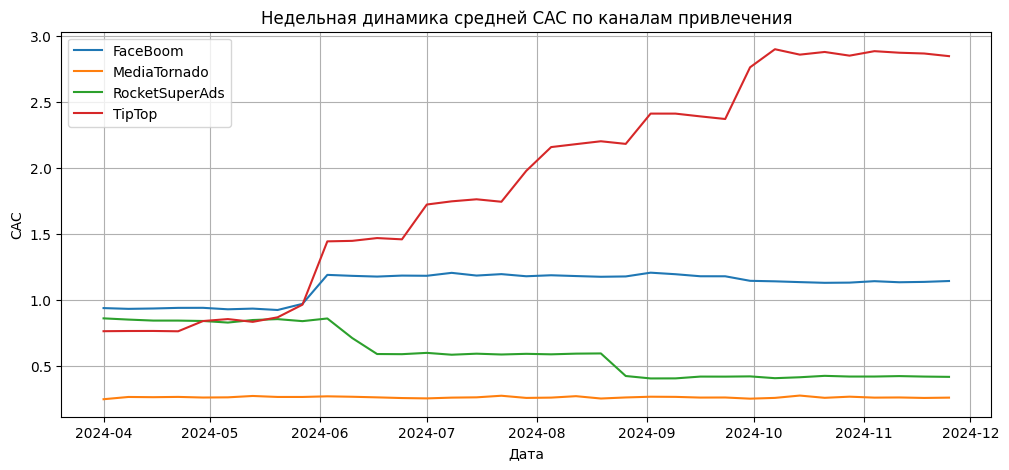

In [ ]:
#рассчитываем среднее значение CAC
cac_mean_weekly = profiles.groupby(['first_channel','cohort_week'])['cac'].mean().reset_index()

#строим график
plt.subplots(figsize=(12,5))

for value in cac_mean_weekly['first_channel'].unique():
    plt.plot(
        cac_mean_weekly[cac_mean_weekly['first_channel'] == value]['cohort_week'],
        cac_mean_weekly[cac_mean_weekly['first_channel'] == value]['cac']
    )

plt.title('Недельная динамика средней CAC по каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('CAC')
plt.grid(True)
plt.legend(labels = cac_mean_weekly['first_channel'].unique())

plt.show()

Увеличение затрат на маркетинг по каналу TipTop привело к росту CAC по данному каналу более чем в 2 раза. Это в свою очередь привело к росту общего среднего CAC, который был выявлен ранее.

По каналу RocketSuperAds наблюдается небольшое снижение CAC, в то время как по каналу FaceBoom виден незначительный рост CAC. По каналу MediaTornado CAC осталась на прежнем уровне.

Рассмотрим недельную динамику средних значений LTV в разбивке по каналам привлечения. При расчёте будем учитывать только те покупки, которые были совершены не позднее 28-ого дня с момента регистрации.

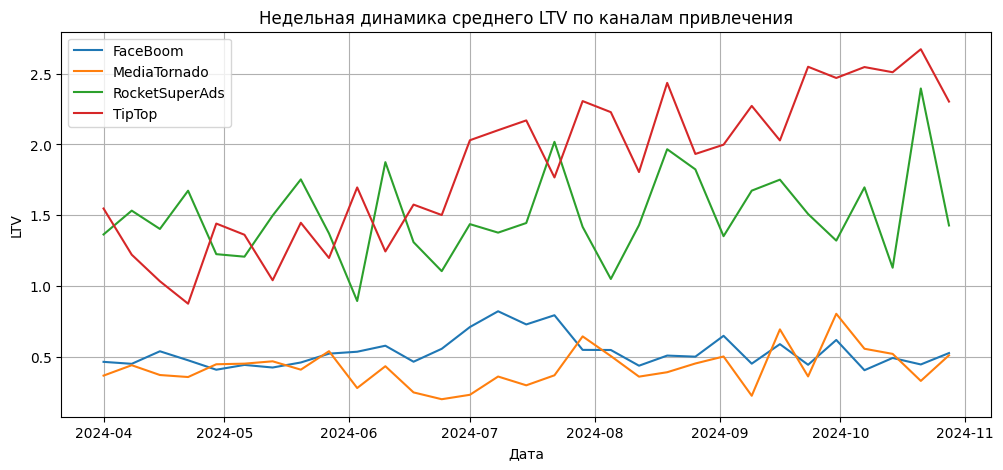

In [ ]:
#фильтруем только релевантные покупки
relevant_orders = orders[orders['lifetime'].between(0,28) & (orders['cohort_week'] <= '2024-10-28')].copy()

#рассчитываем среднее значение LTV

relevant_orders = relevant_orders.groupby(['first_channel','cohort_week'])['revenue'].sum().reset_index()

ltv_mean_weekly = pd.merge(weekly_profiles,
                           relevant_orders,
                           on = ['first_channel', 'cohort_week'],
                           how = 'left')

ltv_mean_weekly['LTV'] = ltv_mean_weekly['revenue'] / ltv_mean_weekly['users_visited']

#строим график
plt.subplots(figsize=(12,5))

for value in ltv_mean_weekly['first_channel'].unique():
    plt.plot(
        ltv_mean_weekly[ltv_mean_weekly['first_channel'] == value]['cohort_week'],
        ltv_mean_weekly[ltv_mean_weekly['first_channel'] == value]['LTV']
    )

plt.title('Недельная динамика среднего LTV по каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('LTV')
plt.grid(True)
plt.legend(labels = ltv_mean_weekly['first_channel'].unique())

plt.show()

Начиная с июня заметен рост LTV по каналу TipTop. Однако можно заметить, что рост LTV по данному каналу привлечения не такой стремительный, как рост CAC. Это может отрицательно сказаться на ROI.
Заметен также рост LTV по каналу RocketSuperAds. Начиная с августа виден небольшой рост LTV по каналу MediaTornado. По каналу FaceBoom виден небольшой всплекс LTV с июля по август, однако далее LTV возвращается на уровень июня.

Рассчитаем ROI  в разбивке по каналам привлечения.

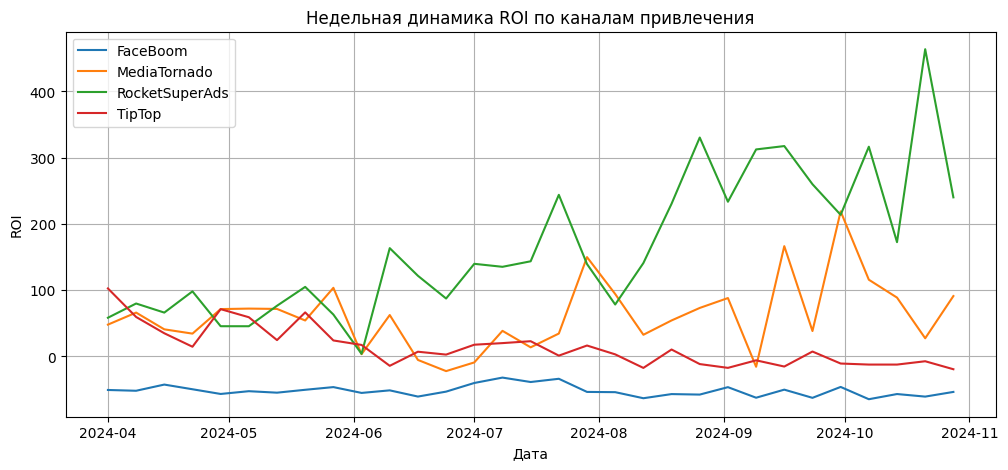

In [ ]:
#объединяем данные
roi_df_weekly = pd.merge(cac_mean_weekly,
                         ltv_mean_weekly,
                         on = ['first_channel','cohort_week'],
                         how = 'left')
#рассчитываем ROI
roi_df_weekly['ROI'] = (roi_df_weekly['LTV'] - roi_df_weekly['cac'])/roi_df_weekly['cac'] * 100


#строим график
plt.subplots(figsize=(12,5))

for value in roi_df_weekly['first_channel'].unique():
    plt.plot(
        roi_df_weekly[roi_df_weekly['first_channel'] == value]['cohort_week'],
        roi_df_weekly[roi_df_weekly['first_channel'] == value]['ROI']
    )

plt.title('Недельная динамика ROI по каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('ROI')
plt.grid(True)
plt.legend(labels = roi_df_weekly['first_channel'].unique())

plt.show()

В результате небольшого снижения маркетинговых затрат, снижения CAC и роста LTV удалось достигнуть существенного улучшения окупаемости по каналу RocketSuperAds. Данный канал показывает самые высокие показатели окупаемости по сравнению с остальными. Положительная окупаемость также сохраняется по каналу MediaTornado, по которому самые низкие затраты на маркетинг и, как следствие самая низкая CAC. Таким образом, даже небольшое повышение LTV для данного канала, которое наблюдается с августа, оказало положительное влияние на ROI.

По каналу FaceBoom на протяжении всего наблюдаемого периода сохраняется отрицательная окупаемость.

По каналу TipTop заметно снижение ROI, начиная с летнего периода и постепенный выход метрики на отрицательные значения. Это говорит о том, что повышенение маркетинговых затрат на данный канал и рост CAC не привели к ожидаемомому повышению LTV и, как следствие окупаемость упала.

## Вывод

В результате анализа метрик в разрезе каналов привлечения можно сделать следующие выводы:

- Окупаемость канала FaceBoom сохраняет отрицательные значения. Несмотря на то, что данный канал демонстрирует положительную динамику по количеству новых пользователей, большинство из них не возвращается к повторному использованию приложения и не совершает покупки в приложении. Среди пользователей, соевршающих покуки в первый день после регистрации, менее 10% совершают повторные транзакции с 14-ого по 28-й день. При этом маркетинговые затраты на данный канал сохраняются на высоком уровне по сравнению с каналами MediaTornado и RocketSuperAds, которые демонстрируют более высокую окупаемость;

- Окупаемость канала TipTop после изменения стратегии привлечения пользователей демонстрирует отрицательную динамику. Stickiness Ratio говорит о том, что вовлеченность пользователей выросла, однако при этом возросли маркетинговые расходы на данный канал, что в свою очередь привело к значительному росту CAC. Стоит отметить, что данный канал демонстрирует положительную динамику конверсии в покупку и RR, что говорит о том, что пользователи, привлеченные через данный канал вносят значительный вклад в LTV;

- Окупаемость канала RocketSuperAds демонстрирует положительную динамику и держится на самом высоком уровне по сравнению с остальными каналами привлечения пользователей. Пользователи, привлеченные через данный канал, демонстрируют высокую вовлеченность. При этом LTV по данному каналу также находится на высоком уровне. Пользователи, привлеченные через данный канал охотно совершают первую покупку и часто совершают повторные покупки. Маркетинговые затраты на данный канал привлечения гораздо меньше по сравнению с каналами TipTop и FaceBoom, благодря чему удается сохранять низкую CAC. На основании показателей по данному каналу можно сделать вывод о том, что пользователи проявляют повышенный интерес к приложению после появления нового типа контента;

- Окупамоесть канал MediaTornado также демонстрирует положительную динамику. Маркетинговые затраты на данный канал самые низкие, благодаря чему удается сохранять низкую CAC. Среди пользователей, привлеченных через данный канал, наблюдается достаточно высокий показатель RR, что говорит о том, что многие пользователи возвращаются к совершению повторных покупок. Тем не менее, данный канал демонстрирует самый низкий уровень конверсии в покупку.

# Анализ периода окупаемости маркетинговых вложений

Рассчитаем период окупаемости в неделях для каждого канала привлечения и проанализируем, окупаются вложения по каналам FaceBoom и TipTop в течение 10 недель.

In [ ]:
#находим cac по неделям
weekly_costs = costs.groupby(['channel','week'])['costs'].sum().reset_index()

weekly_cac = pd.merge(weekly_costs,
                      weekly_profiles,
                      left_on = ['channel','week'],
                      right_on = ['first_channel','cohort_week'],
                      how = 'left')

weekly_cac['cac'] = weekly_cac['costs'] / weekly_cac['users_visited']

In [ ]:
#рассчитываем сумму выручки по неделям
orders['purchase_week'] = orders['event_dt'].dt.to_period('W').dt.to_timestamp()

orders['n_week'] = ((orders['purchase_week'] - orders['cohort_week']).dt.days.astype(int) / 7).astype(int)

orders_weekly = orders.groupby(['first_channel','cohort_week','n_week'])['revenue'].sum().reset_index()

orders_weekly['cummulative_revenue'] = orders_weekly.sort_values(by = ['first_channel',
                                                                      'cohort_week',
                                                                      'n_week']).groupby(['first_channel',
                                                                                          'cohort_week'])['revenue'].transform('cumsum')


In [ ]:
#находим LTV и ROI
orders_weekly = pd.merge(orders_weekly,
                         weekly_cac,
                         on = ['first_channel','cohort_week'],
                         how = 'left')

orders_weekly['LTV'] = orders_weekly['cummulative_revenue'] / orders_weekly['users_visited']

orders_weekly['ROI'] = (orders_weekly['LTV'] - orders_weekly['cac']) / orders_weekly['cac']

Рассмотрим динамику окупаемости по неделям для канала TipTop.

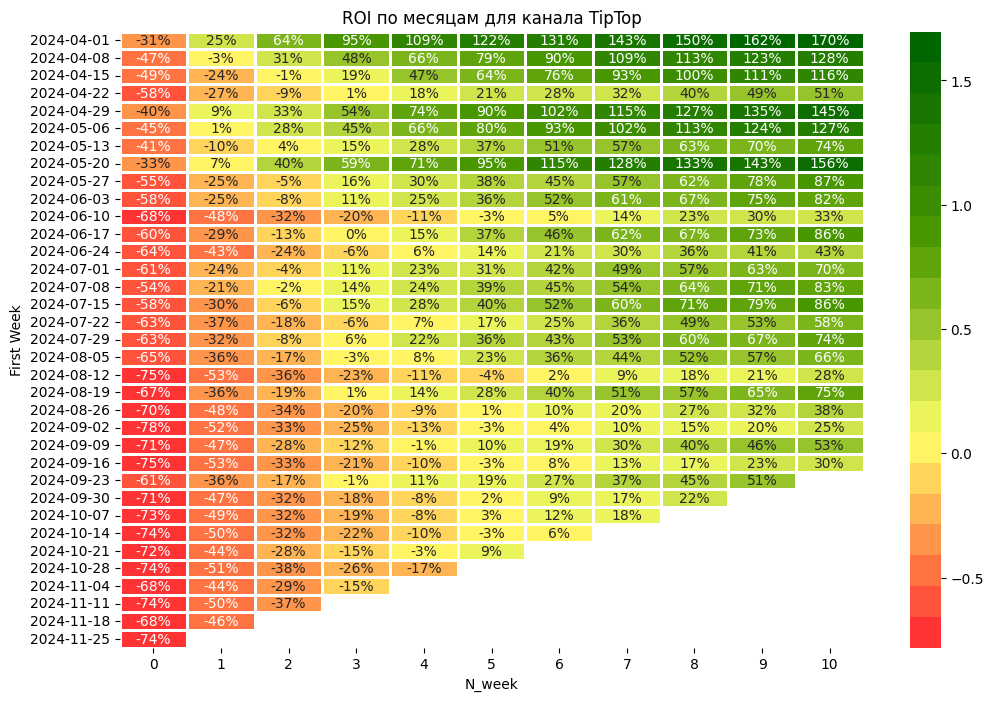

In [ ]:
#визуализиурем ROI для канала TipTop
orders_tip_top = orders_weekly[(orders_weekly['first_channel'] == 'TipTop') & (orders_weekly['n_week'].between(0,10))].copy()

orders_tip_top['cohort_week'] = orders_tip_top['cohort_week'].dt.strftime('%Y-%m-%d')

orders_tt_pivot = pd.pivot_table(orders_tip_top,
                                 columns = 'n_week',
                                 index = 'cohort_week',
                                 values = 'ROI')

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66', '#4C9900', '#006600'], N=20)

# строим heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(orders_tt_pivot,
          cmap=cmap,
          annot=True,
          fmt='.0%',
          linewidths=2,
          annot_kws={"size": 10})


plt.title('ROI по месяцам для канала TipTop')
plt.xlabel('N_week')
plt.ylabel('First Week')
plt.show()

До повышения затрат на маркетинг, окупамоесть затрат на привлечение через канал ROI достигалась к третьей неделе. Для более поздних когорт срок окупаемости существенно увеличился и стал доходить до 6 недель. Таким образом, увеличение CAC увеличило срок окупаемости почти в два раза.

Теперь рассчитаем динамику ROI для канала FaceBoom.

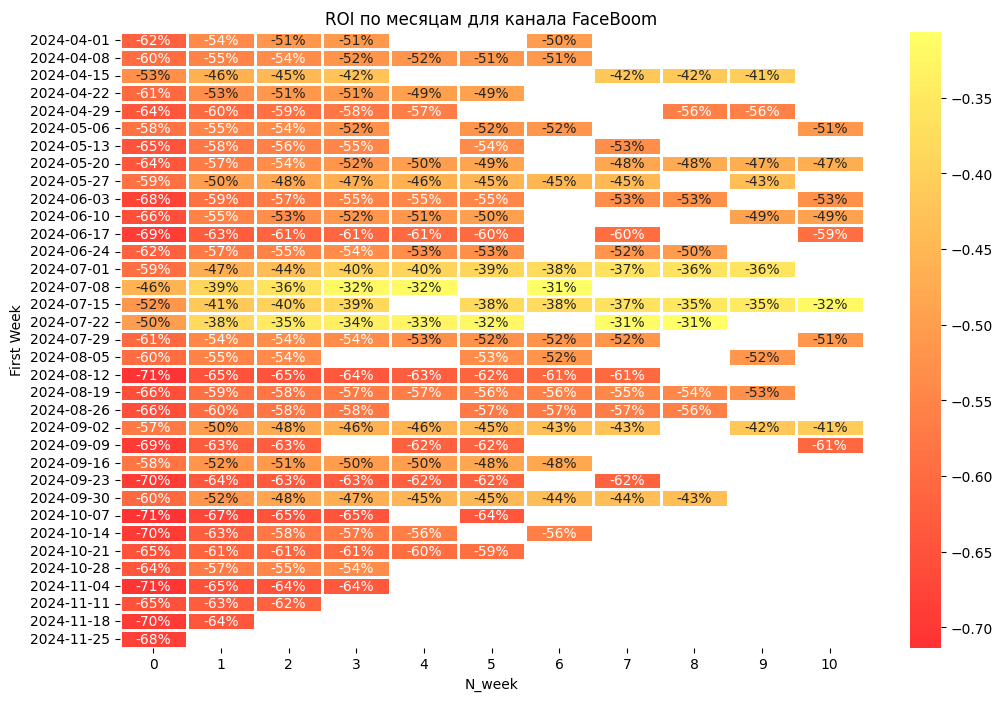

In [ ]:
#визуализиурем ROI для канала TipTop
orders_face_boom = orders_weekly[(orders_weekly['first_channel'] == 'FaceBoom') & (orders_weekly['n_week'].between(0,10))].copy()

orders_face_boom['cohort_week'] = orders_face_boom['cohort_week'].dt.strftime('%Y-%m-%d')

orders_fb_pivot = pd.pivot_table(orders_face_boom,
                                 columns = 'n_week',
                                 index = 'cohort_week',
                                 values = 'ROI')

cmap = mcolors.LinearSegmentedColormap.from_list('green_red', ['#FF3333', '#FFFF66'], N=100)

# строим heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(orders_fb_pivot,
           cmap=cmap,
           annot=True,
           fmt='.0%',
           linewidths=2,
           annot_kws={"size": 10})


plt.title('ROI по месяцам для канала FaceBoom')
plt.xlabel('N_week')
plt.ylabel('First Week')
plt.show()

В течение 10 недель окупамоесть по каналу FaceBoom не достигается. Это свидетельствует о том, что прибыль, получаемая при помощи пользователей, привлеченных через данный канал не соизмерима с маркетинговым затратами.

Пользователи, привлеченные через данный канал, на каком-то этапе перестают совершать покупки из-за чего ни по одной из когорт так и не удалось достигнуть положительной динамики.

# Выводы и рекомендации


Удорожание привлечения через канал TipTop привело к росту CAC более чем в два раза для пользователей, пришедших в приложение в период с июнь по ноябрь. Рост LTV по данному каналу оказался менее стремительным, из-за чего окупаемость данного канала значительно снизилась. Если ранее большинство когорт достигало окупаемости к трем неделям, то после увеличения затрат на маркетинг срок окупаемости вырос до шести недель. Данный канал по-прежнему привлекает заинтересованную аудиторию, однако стоимость привлечения стала слишком высокой.

Канал FaceBoom показывает отрицательную динамику на протяжении всего наблюдаемого периода, стоимость привлечения пользователей не окупилась ни для одной когорты из рассматриваемого периода. Через данный канал приходит много новых пользователей, однако низкая вовлеченности по данному каналу говорит о том, что многие из них не пользуются приложением повторно. Пользователи, пришедшие через данынй канал, неохотно совершают повторные покупки.

Положительную динамику окупаемости можно отметить по каналам RocketSuperAds и MediaTornado. Пользователи данного канала демонстрируют высокую вовлеченность, а также охотно совершают первую покупку, и чаще стали совершать повторные покупи после появления нового типа контента летом.

На основании полученных выводов можно дать следующие рекоммендации:

- Необходимо рассмотреть целесообразность привлечения пользователей через канал FaceBoom. Несмотря на большой поток новых пользователей, лишь небольшая часть из ни возвращается к повторному использованию приложения, и еще меньшая доля пользователей совершает покупки в приложении. При этом затраты на привлечение пользователей через данный канал остаются сравнительно высокими, что приводит к отрицательной окупаемости;

- Необходимо также пресмотреть затраты на привлечение пользователей через канал TipTop. Существенное увеличение маркетинговых расходов отрицательно сказалось на сроках окупаемости. При этом LTV по данному каналу привлечения остается сравнительно высоким;

- Канал RocketSuperAds демонстрирует лучшие затраты по окупаемости. Возможно стоит сделать упор на увеличение поток пользователей, пришедших через данный канал. Количество пользователей, пришедших через данный канал невелико, однако они демонтрируют высокую вовлеченность и охотно совершают покупки в приложении. Вероятно пользователи находят контент релевантным, а нововведение в виде спортивного контента побудило их охотнее совершать покупки в приложении
